# Setup

In [62]:
pip install -r ../requirements.txt

Looking in indexes: https://pypi.org/simple/, https://****@pkgs.dev.azure.com/parsionate-ai/ps-libraries/_packaging/pypi-feed/pypi/simple

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
# Add directory above current directory to path
import sys; sys.path.insert(0, '..')

In [64]:
import pandas as pd
import numpy as np
import os
import gzip
import glob
import json
from tqdm import tqdm
from data_loader.abo import ABO

In [65]:
path = "../datasets/abo"

# Downloading data

Here we want to preprocess and view the data ourselves, so we set `preprocess=False`

In [66]:
ABO(path=path,
    download=True,
    extract=True,
    preprocess=False)

abo-listings.tar already exists.
Extracting abo-listings.tar...
abo-images-small.tar already exists.
Extracting abo-images-small.tar...


# Load images

In [67]:
with gzip.open(os.path.join(path,'images/metadata/images.csv.gz')) as f:
    images_meta = pd.read_csv(f)
images_meta.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [68]:
images_meta.shape

(398212, 4)

In [69]:
images_meta.isna().sum()

image_id    0
height      0
width       0
path        0
dtype: int64

# Load texts

In the following section, we manually concatenate all the JSON listings in `./datasets/abo/listings`.

However, since this operation takes very long (>30-60mins) and it only needs to be executed once, we include the resulting [`listings.csv` in gzip format](./datasets/abo/listings/listings.csv.gz) in this repository for convenience.

Therefore, you may skip directly to [section "Import listings CSV"](#import-listings-csv).

In [5]:
json_pattern = os.path.join(path,'listings/metadata/listings_*.json.gz')
print(json_pattern)
file_list = glob.glob(json_pattern)
dfs = []

for f in file_list:
    with gzip.open(f) as f2:
        data = pd.read_json(f2, lines=True)
        print(f, len(data))
        for i, row in tqdm(data.iterrows(), total=data.shape[0]):
            dfs2 = []
            for k in row.keys():
                if (type(row[k]) is list):
                    if (type(row[k][0]) is dict):
                        dfs2.append(pd.json_normalize(row[k][0]).add_prefix(k + "."))
                    else:
                        dfs2.append(pd.DataFrame({k: [row[k]]}))
                else:
                    dfs2.append(pd.DataFrame({k: [row[k]]}))
            dfs.append(dfs2)

./datasets/abo/listings/metadata/listings_*.json
./datasets/abo/listings/metadata/listings_a.json 9232


100%|██████████| 9232/9232 [01:21<00:00, 113.35it/s]


./datasets/abo/listings/metadata/listings_6.json 9232


100%|██████████| 9232/9232 [01:18<00:00, 117.30it/s]


./datasets/abo/listings/metadata/listings_c.json 9232


100%|██████████| 9232/9232 [01:17<00:00, 118.98it/s]


./datasets/abo/listings/metadata/listings_7.json 9232


100%|██████████| 9232/9232 [01:16<00:00, 120.60it/s]


./datasets/abo/listings/metadata/listings_3.json 9232


100%|██████████| 9232/9232 [01:18<00:00, 117.65it/s]


./datasets/abo/listings/metadata/listings_d.json 9232


100%|██████████| 9232/9232 [01:20<00:00, 114.65it/s]


./datasets/abo/listings/metadata/listings_4.json 9232


100%|██████████| 9232/9232 [01:20<00:00, 114.08it/s]


./datasets/abo/listings/metadata/listings_0.json 9232


100%|██████████| 9232/9232 [01:13<00:00, 125.10it/s]


./datasets/abo/listings/metadata/listings_2.json 9232


100%|██████████| 9232/9232 [01:24<00:00, 109.47it/s]


./datasets/abo/listings/metadata/listings_e.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.70it/s]


./datasets/abo/listings/metadata/listings_b.json 9232


100%|██████████| 9232/9232 [01:26<00:00, 106.67it/s]


./datasets/abo/listings/metadata/listings_f.json 9222


100%|██████████| 9222/9222 [01:13<00:00, 126.11it/s]


./datasets/abo/listings/metadata/listings_5.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.48it/s]


./datasets/abo/listings/metadata/listings_9.json 9232


100%|██████████| 9232/9232 [01:29<00:00, 103.48it/s]


./datasets/abo/listings/metadata/listings_8.json 9232


100%|██████████| 9232/9232 [01:13<00:00, 125.15it/s]


./datasets/abo/listings/metadata/listings_1.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.19it/s]


Serializing as pickle may take too long. Recommend exporting to CSV instead, it is much faster.

In [ ]:
# import pickle
# with open("dfs", "wb") as fp:
#     pickle.dump(dfs, fp)

In [ ]:
# dfs = []

# with open("dfs", "rb") as fp:
#     dfs = pickle.load(fp)

The following two cells may also take some time.

In [6]:
dfs_1 = []

for df in tqdm(dfs):
    dfs_1.append(pd.concat(df, axis=1))

100%|██████████| 147702/147702 [02:51<00:00, 861.85it/s] 


In [7]:
dfs_2 = pd.concat(dfs_1)
dfs_2

,item_dimensions,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,...,fabric_type.value,node,item_shape.language_tag,item_shape.value,product_description.language_tag,product_description.value,finish_type.language_tag,finish_type.value,brand,item_name.alternate_representations
0,{'height': {'normalized_value': {'unit': 'inch...,es_ES,Pinzon by Amazon,es_ES,Sábana bajera ajustable - Dimensiones: 90 x 20...,es_ES,Azul,B00MGSFTLE,es_ES,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Klepe,hi_IN,आउटर मटीरियल: PU,hi_IN,गहरा ग्रे(स्लेटी),B07WRK7NGQ,en_IN,Klepe Men's Dark Grey Running Shoes-11 UK (45 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511RJ3W,en_IN,Amazon Brand - Solimo Designer Two Different P...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511NVLY,en_IN,Amazon Brand - Solimo Designer Wooden Blocks T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,en_US,Allegro Coffee,en_US,Kosher,NaN,NaN,B078ZMFWC3,en_US,"Allegro Tea, Tea Spice Puer Yunnan Organic, 0....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,en_IN,Flavia,ml_IN,പുറമെയുള്ള മെറ്റീരിയൽ: PU,ml_IN,ഇളം ചാരനിറം,B07ZFRKDSD,ml_IN,Flavia സ്ത്രീകളുടെ Ballet ഫ്ലാറ്റ്സ് - ചാരനിറം...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,de_DE,Tovess,de_DE,"Ein Premium Dry Gin, der im „Single Batch“-Des...",NaN,NaN,B07WQJ3DZ8,de_DE,"Tovess- Single Batch Crafted Gin (0,04 l)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,en_US,365 Everyday Value,en_US,Produced without added hormones.,NaN,NaN,B074H65ZYT,en_US,"365 Everyday Value, Havarti Cheese, Slices, 12 oz",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_US,Red Wagon,en_US,Suede-effect upper,en_US,Grey,B072KWH977,en_US,"Red Wagon Girls' Muck Desert Boots, Grey, 8 us",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dfs_2["other_image_id"].notna()

0    True
0    True
0    True
0    True
0    True
     ... 
0    True
0    True
0    True
0    True
0    True
Name: other_image_id, Length: 147702, dtype: bool

In [9]:
dfs_2.reset_index(drop=True, inplace=True)
dfs_2.to_csv(os.path.join(path, "listings/listings.csv"))

## Import listings CSV

In [10]:
from ast import literal_eval

In [11]:
# dfs = pd.read_csv(os.path.join(path, "listings/listings.csv"))

with gzip.open(os.path.join(path, "listings/listings.csv.gz")) as f:
    dfs = pd.read_csv(f, dtype=object)

In [12]:
dfs = dfs.drop(['Unnamed: 0'], axis=1)
#dfs = dfs.drop(['Unnamed: 0.1'], axis=1)
dfs

,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,model_name.language_tag,...,color,pattern.language_tag,pattern.value,node,finish_type.language_tag,finish_type.value,item_shape.language_tag,item_shape.value,item_name.alternate_representations,brand
0,nl_NL,find.,nl_NL,Schoen in Loafer-stijl,nl_NL,Veelkleurig Vrouw Blauw,B06X9STHNG,nl_NL,Amazon-merk - vinden. Dames Leder Gesloten Tee...,nl_NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,es_MX,AmazonBasics,es_MX,White Powder Coat Finish,es_MX,White Powder Coat,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,en_AE,AmazonBasics,en_AE,3D printer filament with 1.75mm diameter + / -...,en_AE,Translucent Yellow,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,en_GB,Stone & Beam,NaN,NaN,en_GB,Stone Brown,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,en_AU,The Fix,en_AU,Embroidered flowers bloom against understated ...,en_AU,Havana Tan,B01MTEI8M6,en_AU,The Fix Amazon Brand Women's French Floral Emb...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147697,es_ES,AmazonBasics,es_ES,"20 l de capacidad, plato giratorio de 255 mm; ...",es_ES,Negro,B08158K336,es_ES,"AmazonBasics – Microondas de mesa básico, 20 l...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147698,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Mobile, with perfect cut-outs for...",en_IN,multi-colored,B081HNG4QN,en_IN,Amazon Brand - Solimo Designer Abstract 3D Pri...,en_IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147699,en_US,365 Everyday Value,en_US,Brought to you by Whole Foods Market. Our sta...,NaN,NaN,B074JD6D3V,en_US,"365 EVERYDAY VALUE Organic Quinoa, 16 OZ",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147700,es_MX,Stone & Beam,NaN,NaN,NaN,NaN,B07CVCTSF8,es_MX,Stone & Beam - Alfombra Informal a Cuadros,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Augmentation with alternative product images

You may skip this section if this augmentation is not needed.

In [70]:
dfs["other_image_id"] = dfs["other_image_id"].fillna("[]")

In [71]:
dfs["other_image_id"] = dfs["other_image_id"].apply(literal_eval)

In [72]:
dfs_3 = dfs.explode(["other_image_id"])

In [73]:
dfs_3["main_image_id"] = dfs_3["other_image_id"]

In [74]:
dfs = pd.concat([dfs, dfs_3])
dfs

,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,model_name.language_tag,...,color,pattern.language_tag,pattern.value,node,finish_type.language_tag,finish_type.value,item_shape.language_tag,item_shape.value,item_name.alternate_representations,brand
0,nl_NL,find.,nl_NL,Schoen in Loafer-stijl,nl_NL,Veelkleurig Vrouw Blauw,B06X9STHNG,nl_NL,Amazon-merk - vinden. Dames Leder Gesloten Tee...,nl_NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,es_MX,AmazonBasics,es_MX,White Powder Coat Finish,es_MX,White Powder Coat,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,en_AE,AmazonBasics,en_AE,3D printer filament with 1.75mm diameter + / -...,en_AE,Translucent Yellow,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,en_GB,Stone & Beam,NaN,NaN,en_GB,Stone Brown,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,en_AU,The Fix,en_AU,Embroidered flowers bloom against understated ...,en_AU,Havana Tan,B01MTEI8M6,en_AU,The Fix Amazon Brand Women's French Floral Emb...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147700,es_MX,Stone & Beam,NaN,NaN,NaN,NaN,B07CVCTSF8,es_MX,Stone & Beam - Alfombra Informal a Cuadros,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147701,en_CA,find.,en_CA,Elastic strap in outer lining,NaN,NaN,B07WSKB7LR,en_CA,Amazon Brand - find. Men’s Espadrilles,en_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147701,en_CA,find.,en_CA,Elastic strap in outer lining,NaN,NaN,B07WSKB7LR,en_CA,Amazon Brand - find. Men’s Espadrilles,en_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147701,en_CA,find.,en_CA,Elastic strap in outer lining,NaN,NaN,B07WSKB7LR,en_CA,Amazon Brand - find. Men’s Espadrilles,en_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
dfs.reset_index(drop=True, inplace=True)
dfs

,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,model_name.language_tag,...,color,pattern.language_tag,pattern.value,node,finish_type.language_tag,finish_type.value,item_shape.language_tag,item_shape.value,item_name.alternate_representations,brand
0,nl_NL,find.,nl_NL,Schoen in Loafer-stijl,nl_NL,Veelkleurig Vrouw Blauw,B06X9STHNG,nl_NL,Amazon-merk - vinden. Dames Leder Gesloten Tee...,nl_NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,es_MX,AmazonBasics,es_MX,White Powder Coat Finish,es_MX,White Powder Coat,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,en_AE,AmazonBasics,en_AE,3D printer filament with 1.75mm diameter + / -...,en_AE,Translucent Yellow,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,en_GB,Stone & Beam,NaN,NaN,en_GB,Stone Brown,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,en_AU,The Fix,en_AU,Embroidered flowers bloom against understated ...,en_AU,Havana Tan,B01MTEI8M6,en_AU,The Fix Amazon Brand Women's French Floral Emb...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720949,es_MX,Stone & Beam,NaN,NaN,NaN,NaN,B07CVCTSF8,es_MX,Stone & Beam - Alfombra Informal a Cuadros,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720950,en_CA,find.,en_CA,Elastic strap in outer lining,NaN,NaN,B07WSKB7LR,en_CA,Amazon Brand - find. Men’s Espadrilles,en_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720951,en_CA,find.,en_CA,Elastic strap in outer lining,NaN,NaN,B07WSKB7LR,en_CA,Amazon Brand - find. Men’s Espadrilles,en_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720952,en_CA,find.,en_CA,Elastic strap in outer lining,NaN,NaN,B07WSKB7LR,en_CA,Amazon Brand - find. Men’s Espadrilles,en_CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploration

## Columns, size...

In [76]:
dfs.columns

Index(['brand.language_tag', 'brand.value', 'bullet_point.language_tag',
       'bullet_point.value', 'color.language_tag', 'color.value', 'item_id',
       'item_name.language_tag', 'item_name.value', 'model_name.language_tag',
       'model_name.value', 'model_number.value', 'model_year.value',
       'product_type.value', 'style.language_tag', 'style.value',
       'main_image_id', 'other_image_id', 'item_keywords.language_tag',
       'item_keywords.value', 'country', 'marketplace', 'domain_name',
       'node.node_id', 'node.node_name', 'item_dimensions', 'item_weight',
       'material', 'fabric_type', 'color_code', 'product_description',
       'spin_id', '3dmodel_id', 'pattern', 'finish_type', 'item_shape',
       'model_name', 'model_year', 'item_weight.unit', 'item_weight.value',
       'item_weight.normalized_value.unit',
       'item_weight.normalized_value.value', 'material.language_tag',
       'material.value', 'bullet_point', 'style', 'color.standardized_values',
      

In [77]:
dfs.shape

(720954, 63)

## Class distribution

[Text(0, 0, 'CELLULAR_PHONE_CASE'),
 Text(1, 0, 'SHOES'),
 Text(2, 0, 'GROCERY'),
 Text(3, 0, 'HOME'),
 Text(4, 0, 'HOME_BED_AND_BATH'),
 Text(5, 0, 'HOME_FURNITURE_AND_DECOR'),
 Text(6, 0, 'CHAIR'),
 Text(7, 0, 'SANDAL'),
 Text(8, 0, 'BOOT'),
 Text(9, 0, 'HEALTH_PERSONAL_CARE'),
 Text(10, 0, 'SOFA'),
 Text(11, 0, 'PET_SUPPLIES'),
 Text(12, 0, 'TABLE'),
 Text(13, 0, 'OFFICE_PRODUCTS'),
 Text(14, 0, 'HARDWARE_HANDLE'),
 Text(15, 0, 'HANDBAG'),
 Text(16, 0, 'FINERING'),
 Text(17, 0, 'SPORTING_GOODS'),
 Text(18, 0, 'RUG'),
 Text(19, 0, 'LIGHT_BULB')]

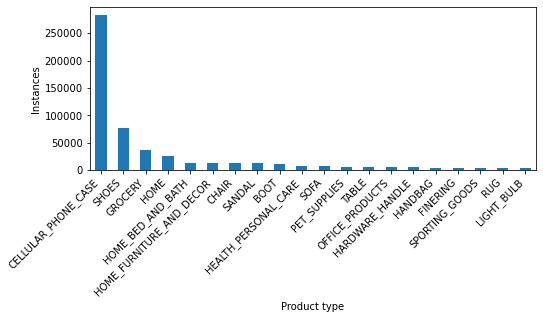

In [78]:
top_n = 20

ax = dfs.groupby(['product_type.value']).size().sort_values(ascending=False).head(top_n).plot.bar(rot=45, figsize=(8,3), xlabel="Product type", ylabel="Instances")
ax.set_xticklabels(ax.get_xticklabels(), ha="right")

In [79]:
dfs.groupby(['product_type.value']).size().sort_values()

product_type.value
SKIN_FOUNDATION_CONCEALER         2
TIMER                             2
SLEEP_MASK                        2
STROLLER                          2
TERMINAL_BLOCK                    2
                              ...  
HOME_BED_AND_BATH             13536
HOME                          25573
GROCERY                       36380
SHOES                         76887
CELLULAR_PHONE_CASE          283549
Length: 576, dtype: int64

# Ground truth

In [80]:
listings_new = dfs[["item_keywords.value", "brand.value", "item_id", "item_name.language_tag", "item_name.value", "product_type.value", "product_description.value", "main_image_id"]]

## Merge images and texts

In [81]:
ground_truth = listings_new.merge(images_meta, left_on='main_image_id', right_on='image_id')

## Copy columns for experiments on extended MNN-EM

In [82]:
ground_truth["item_keywords.value2"] = ground_truth["item_keywords.value"]
ground_truth["item_id2"] = ground_truth["item_id"]
ground_truth["item_name.value2"] = ground_truth["item_name.value"]

## Target labels for MNN-EM

In [83]:
ground_truth["label"] = 1

In [84]:
ground_truth.head(10)

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
0,block heel shoes,find.,B06X9STHNG,nl_NL,Amazon-merk - vinden. Dames Leder Gesloten Tee...,SHOES,NaN,81iZlv3bjpL,81iZlv3bjpL,2560,1969,8c/8ccb5859.jpg,block heel shoes,B06X9STHNG,Amazon-merk - vinden. Dames Leder Gesloten Tee...,1
1,block heel shoes,find.,B06X9GMSD5,en_CA,find. Amazon Brand Women’s Leather Closed-Toe ...,SHOES,NaN,81iZlv3bjpL,81iZlv3bjpL,2560,1969,8c/8ccb5859.jpg,block heel shoes,B06X9GMSD5,find. Amazon Brand Women’s Leather Closed-Toe ...,1
2,NaN,find.,B06X9WQGQP,en_GB,find. Women’s Ari Heeled Closed-Toe Heels,SHOES,NaN,81iZlv3bjpL,81iZlv3bjpL,2560,1969,8c/8ccb5859.jpg,NaN,B06X9WQGQP,find. Women’s Ari Heeled Closed-Toe Heels,1
3,22,AmazonBasics,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",HARDWARE,NaN,619y9YG9cnL,619y9YG9cnL,1200,1200,9f/9f76d27b.jpg,22,B07P8ML82R,"22"" Bottom Mount Drawer Slides, White Powder C...",1
4,NaN,AmazonBasics,B01MS9NPOE,tr_TR,"AmazonBasics – Avrupa çekmece rayları, alt tar...",HARDWARE,NaN,619y9YG9cnL,619y9YG9cnL,1200,1200,9f/9f76d27b.jpg,NaN,B01MS9NPOE,"AmazonBasics – Avrupa çekmece rayları, alt tar...",1
5,3d printer filament,AmazonBasics,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",MECHANICAL_COMPONENTS,NaN,81NP7qh2L6L,81NP7qh2L6L,2492,2492,66/665cc994.jpg,3d printer filament,B07H9GMYXS,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",1
6,love,Stone & Beam,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",SOFA,NaN,61Rp4qOih9L,61Rp4qOih9L,500,500,b4/b4f9d0cc.jpg,love,B07CTPR73M,"Stone & Beam Stone Brown Swatch, 25020039-01",1
7,zapatos shoe para de ladies mujer womans mocas...,The Fix,B01MTEI8M6,en_AU,The Fix Amazon Brand Women's French Floral Emb...,SHOES,NaN,714CmIfKIYL,714CmIfKIYL,868,1779,2b/2b1c2516.jpg,zapatos shoe para de ladies mujer womans mocas...,B01MTEI8M6,The Fix Amazon Brand Women's French Floral Emb...,1
8,zapatos shoe para de ladies mujer womans mocas...,The Fix,B072C682N6,en_AU,The Fix Amazon Brand Women's French Floral Emb...,SHOES,NaN,714CmIfKIYL,714CmIfKIYL,868,1779,2b/2b1c2516.jpg,zapatos shoe para de ladies mujer womans mocas...,B072C682N6,The Fix Amazon Brand Women's French Floral Emb...,1
9,cellphonecover,Amazon Brand - Solimo,B0853X2F4M,en_IN,Amazon Brand - Solimo Designer Autumn Girl 3D ...,CELLULAR_PHONE_CASE,NaN,81+4dBN1jsL,81+4dBN1jsL,2200,1879,9d/9dfccb37.jpg,cellphonecover,B0853X2F4M,Amazon Brand - Solimo Designer Autumn Girl 3D ...,1


In [85]:
ground_truth[ground_truth["item_id"] == "B07TBV5BY9"]

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
62210,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,71hKkUIj9dL,71hKkUIj9dL,2200,1879,b0/b01a3299.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1
205282,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,61oI69Yt4GL,61oI69Yt4GL,1107,1280,ee/ee8ee952.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1
238597,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,61Xce1Hq7DL,61Xce1Hq7DL,1059,1500,49/49b1b22b.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1
271913,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,61ATVyzpLKL,61ATVyzpLKL,1500,1500,66/66f3a68c.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1
512682,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,811HRaF0oOL,811HRaF0oOL,2200,1879,b9/b92cff25.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1


# False samples/Complement

In [86]:
false_samples = ground_truth.apply(np.random.permutation, axis=0)

## Target labels for MNN-EM

In [87]:
false_samples["label"] = 0

In [88]:
false_samples.head(10)

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
0,mobile cover,AmazonBasics,B07TF1DF9Y,en_IN,"Amazon Brand - Solimo Animal Cookies, 13 Ounce",CELLULAR_PHONE_CASE,NaN,51GUmopDutL,61+woWTqkwL,1000,2560,36/36cae1bf.jpg,10.or D2 Case,B07G6PHF5V,Amazon Brand - Solimo Designer Panda Texture U...,0
1,formal casual diseñador zapatos de mujer mujer...,Amazonベーシック(AmazonBasics),B07TB534ZV,en_CA,Amazon Brand - Solimo Designer Wooden Semi Cir...,SHOES,NaN,61ATVyzpLKL,51G8fADdNiL,2560,1508,ee/ee8ee952.jpg,mobile cover,B07Y3VQY8B,Amazon Brand - Solimo Designer Pebbles 3D Prin...,0
2,NaN,AmazonBasics Licensing,B08547YSR3,en_US,Amazon Brand - Inkast Denim Co. Men's Brown Sn...,CELLULAR_PHONE_CASE,NaN,91XrmcPmd7L,61OnkGVhMWL,2200,1000,31/319000b1.jpg,mobile cover,B07T1JR21G,Amazon Brand - Symbol Men's Tan PU Formal Shoe...,0
3,mobile cover,Movian,B078J5ZTS9,en_IN,"Amazon బ్రాండ్ - Solimo కాలేజ్ ఫోటో ఫ్రేమ్స్, ...",RECREATION_BALL,NaN,91sy7GmsQVL,71NOJdFlc3L,1059,2560,66/66f3a68c.jpg,mobile cover,B078H97C75,Amazon Brand - Solimo Designer Peacock Feather...,0
4,NaN,Mama Bear,B073P1BV8W,en_US,Flavia Women's Blue Fashion Sandals-6 UK (38 E...,SHOES,NaN,71OgtLml+jL,61tjmbkJWdL,1000,1609,72/7238c820.jpg,mobile cover,B00DIFIM36,"Chocolate Cake, Quarter Sheet",0
5,Amazon Brand - Solimo,Ravenna Home,B0811N9N87,en_IN,Amazon Brand - Solimo Designer Small Triangle ...,SANDAL,NaN,71CF6jyubPL,61Xce1Hq7DL,2200,1879,a4/a4c2c54a.jpg,cellphonecover,B07HJTDB4S,"AmazonBasics - Asas para mopa con mandíbula, p...",0
6,formal shoes for mens leather,AmazonBasics,B07SZ1867Q,zh_CN,Amazon Brand - Solimo Designer Flower Photogra...,SHOES,NaN,61aUf8CjqmL,71I13mXNYsL,1000,1782,36/36cae1bf.jpg,NaN,B07JHNQM83,Flavia സ്ത്രീകളുടെ റണ്ണിംഗ് ഷൂസ് - പിങ്ക്,0
7,NaN,Amazon Elements,B074H7324Y,en_IN,Amazon Brand - Solimo Designer White Peacock R...,HOME_FURNITURE_AND_DECOR,NaN,51DEYNWtfsL,71Gc9AGIfmL,1000,2560,48/48ca0bb0.jpg,Fiesta de Navidad Año Nuevo Fiesta,B007U0XZC8,"Amazon Brand - Happy Belly Crushed Tomatoes, 1...",0
8,mobile cover,365 Everyday Value,B07TG4SPFM,en_IN,Rivet Contemporary Round Floating Iron 4 Shelf...,SHOES,NaN,916il6rkT1L,61+woWTqkwL,1107,1500,83/83210e34.jpg,Hybid Case,B0853XGSDQ,Amazon Brand - Solimo Designer Candies 3D Prin...,0
9,mobile cover,RED WAGON,B083C71W67,en_IN,"Whole Foods Market 365 磨碎奶酪,Cotija (墨西哥风奶酪),4 ...",BACKPACK,NaN,21J+QJweKiL,71Axic8m7IL,1618,1200,49/491ec38e.jpg,mobile cover,B072QYQRB7,"Amazon Brand - Solimo 运动防晒乳 SPF 30, 2组",0


# Combine ground truth and complement

In [89]:
dataset = pd.concat([ground_truth, false_samples])

In [90]:
# random shuffle
dataset_final = dataset.sample(frac=1, axis=0).reset_index(drop=True)

## Drop unneeded columns

In [91]:
dataset_final = dataset_final.drop(["main_image_id", "image_id", "height", "width", "product_description.value"], axis=1)

In [92]:
dataset_final

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
0,mobile cover,Amazon Brand - Solimo,B07HMFNX7J,en_IN,Amazon Brand - Solimo Designer Pink Sparkle 3D...,OFFICE_ELECTRONICS,ee/ee8ee952.jpg,EFN_FRIT_,B0853X43DR,Amazon Brand - Solimo Designer Cartoon Pattern...,0
1,Drink-mixes,Solimo,B07HHLDV56,zh_CN,亚马逊品牌 - Solimo 柠檬水混合饮料(10 包),JUICE_AND_JUICE_DRINK,98/980edb55.jpg,Drink-mixes,B07HHLDV56,亚马逊品牌 - Solimo 柠檬水混合饮料(10 包),1
2,echtes leder rfid geschützt brieftasche männer...,Amazon Brand - Solimo,B07PRWHLS4,en_IN,Amazon Brand - Solimo Designer Love Birds Vect...,CELLULAR_PHONE_CASE,bf/bf7e7873.jpg,torque wrench bicycle 3/8 breaker bar wrenches...,B07DHPM9RB,Amazon Brand - Solimo Designer Cactus Design 3...,0
3,drunkqueen,Pinzon by Amazon,B085215871,en_GB,Amazon Brand - find. Buckle Mock Croc Metallic...,CELLULAR_PHONE_CASE,2b/2bd6cf61.jpg,Back Cover,B07T251J14,Amazon Brand - Solimo Designer Flowers Photogr...,0
4,soft,AmazonBasics Licensing,B075X4R4LM,en_US,AmazonBasics – AB-BR835-OR handdoek- en badjas...,HANDBAG,35/352fc5fc.jpg,NaN,B088BXQ7YS,Platinum-Plated Sterling Silver 7-Stone Ring m...,0
...,...,...,...,...,...,...,...,...,...,...,...
1421301,studio,Rivet,B0792G6PVH,ko_KR,"Rivet Zane 중부 세기 모던 스위블 탑 그레인 가죽 악센트 의자, 28.75"" W",CHAIR,18/18697f8f.jpg,studio,B0792G6PVH,"Rivet Zane 중부 세기 모던 스위블 탑 그레인 가죽 악센트 의자, 28.75"" W",1
1421302,mobile cover,Amazon Brand - Solimo,B07VX6YW28,en_IN,Amazon Brand - Solimo Designer Colorful Wooden...,CELLULAR_PHONE_CASE,d8/d89025e7.jpg,mobile cover,B07VX6YW28,Amazon Brand - Solimo Designer Colorful Wooden...,1
1421303,beutelspender,RED WAGON,B07DBGXFP1,nl_NL,Amazon Brand - Solimo Designer Foot Impression...,CELLULAR_PHONE_CASE,af/af207bf4.jpg,chromecast,B07Z6WLGF7,Marca Amazon - find. Faroe - Zapatillas altas ...,0
1421304,Fine Fashion,Solimo,B072V81K1Z,en_IN,Amazon Brand - Solimo Designer Butterflies Neo...,DRYING_RACK,ee/ee8ee952.jpg,table-lamps,B07YZXJCJK,Eono by Amazon - Toile tendue Chunky 100cm x 8...,0


## Select only english articles

In [93]:
dataset_final = dataset_final.loc[(dataset_final['item_name.language_tag'] == "en_US") | (dataset_final['item_name.language_tag'] == "en_GB") | (dataset_final['item_name.language_tag'] == "en_IN")]

In [94]:
dataset_final = dataset_final.drop(["brand.value", "item_name.language_tag"], axis=1)

In [95]:
dataset_final = dataset_final.reset_index(drop=True)

In [96]:
dataset_final

,item_keywords.value,item_id,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
0,mobile cover,B07HMFNX7J,Amazon Brand - Solimo Designer Pink Sparkle 3D...,OFFICE_ELECTRONICS,ee/ee8ee952.jpg,EFN_FRIT_,B0853X43DR,Amazon Brand - Solimo Designer Cartoon Pattern...,0
1,echtes leder rfid geschützt brieftasche männer...,B07PRWHLS4,Amazon Brand - Solimo Designer Love Birds Vect...,CELLULAR_PHONE_CASE,bf/bf7e7873.jpg,torque wrench bicycle 3/8 breaker bar wrenches...,B07DHPM9RB,Amazon Brand - Solimo Designer Cactus Design 3...,0
2,drunkqueen,B085215871,Amazon Brand - find. Buckle Mock Croc Metallic...,CELLULAR_PHONE_CASE,2b/2bd6cf61.jpg,Back Cover,B07T251J14,Amazon Brand - Solimo Designer Flowers Photogr...,0
3,soft,B075X4R4LM,AmazonBasics – AB-BR835-OR handdoek- en badjas...,HANDBAG,35/352fc5fc.jpg,NaN,B088BXQ7YS,Platinum-Plated Sterling Silver 7-Stone Ring m...,0
4,black music stand,B07TCWSZNH,Amazon Brand - Solimo Designer Love UV Printed...,CELLULAR_PHONE_CASE,e8/e873164f.jpg,cellphonecover,B07TRW8B9W,AmazonBasics - Stendibiancheria da balcone del...,0
...,...,...,...,...,...,...,...,...,...
879059,cauliflower,B084W2WJJ2,Amazon Brand - Symbol Men's Sneakers,CELLULAR_PHONE_CASE,db/db3631ef.jpg,mobile cover,B07CHCGL24,AmazonFresh Direct Trade Nicaragua Whole Bean ...,0
879060,mobile cover,B07WV2QF2X,Amazon Brand - Solimo Designer Heart Design 3D...,CELLULAR_PHONE_CASE,e4/e4a29136.jpg,mobile cover,B07WV2QF2X,Amazon Brand - Solimo Designer Heart Design 3D...,1
879061,mobile cover,B07VX6YW28,Amazon Brand - Solimo Designer Colorful Wooden...,CELLULAR_PHONE_CASE,d8/d89025e7.jpg,mobile cover,B07VX6YW28,Amazon Brand - Solimo Designer Colorful Wooden...,1
879062,Fine Fashion,B072V81K1Z,Amazon Brand - Solimo Designer Butterflies Neo...,DRYING_RACK,ee/ee8ee952.jpg,table-lamps,B07YZXJCJK,Eono by Amazon - Toile tendue Chunky 100cm x 8...,0


## Random deletion of attributes

In [97]:
dataset_final.isnull().sum()

item_keywords.value     96165
item_id                     0
item_name.value             0
product_type.value          0
path                        0
item_keywords.value2    96416
item_id2                    0
item_name.value2            0
label                       0
dtype: int64

In [98]:
dataset_final.loc[dataset_final["item_keywords.value"].sample(frac=.5).index]

,item_keywords.value,item_id,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
236890,frying pan tefal non-stick non stick pans egg ...,B07CWC6CB6,AmazonBasics Stainless Steel Induction Non Sti...,SAUTE_FRY_PAN,e3/e34ace13.jpg,frying pan tefal non-stick non stick pans egg ...,B07CWC6CB6,AmazonBasics Stainless Steel Induction Non Sti...,1
690532,NaN,B0824FHWSX,Amazon Brand - Solimo Designer Black Pattern A...,PET_SUPPLIES,89/89ffab8b.jpg,hp 301 302 304 ink cartridges hp304 black cart...,B08511C8N4,Eono Jute Round Rustic Burlap Placemats Linen ...,0
76903,dvi,B07PKD2Q9B,La solución de la mujer Kelly Over-The-Knee St...,HOME,ee/ee8ee952.jpg,Retro-Telefon Haustelefone schnurgebunden Fest...,B07Y5CQNZ3,Amazon Brand - Solimo Designer Light Blue Flow...,0
601885,mobile cover,B07TG3R5PM,Amazon Brand - Solimo Designer Peacock 3D Prin...,CELLULAR_PHONE_CASE,66/66f3a68c.jpg,mobile cover,B07TG3R5PM,Amazon Brand - Solimo Designer Peacock 3D Prin...,1
875660,mobile cover,B07Z9WP5LM,"AMAZON Chicken Piccata, 46 OZ",HOME_BED_AND_BATH,ee/ee8ee952.jpg,bathroom,B07MLTLQST,"Wickedly Prime Almendras tostadas, canela-az&u...",0
...,...,...,...,...,...,...,...,...,...
65508,Back Cover,B0857L4X69,Amazon Brand - Solimo Designer Toy Bus 3D Prin...,CELLULAR_PHONE_CASE,00/00d81f52.jpg,Reino Unido.,B08B7RZS66,"Amazon Essentials Evelyn Flats-Sandals, Rose, ...",0
105002,mobile cover,B07N27XP6P,AmazonBasics Bluetooth Keyboard for Android De...,SHOES,85/85192c70.jpg,mobile cover,B07X5DS3HC,Amazon Brand - Solimo Designer Pink Lady Patte...,0
612763,mobile cover,B0854CL9TV,Amazon Brand - Solimo Designer Wooden Beach 3D...,SHELF,e1/e1cdc174.jpg,packing cube travel cubes suitcase organiser f...,B07NQ3WWHT,"find. Prase Leather Closed Toe Heels, Beige (N...",0
284650,cellphonecover,B0853WRRS1,Amazon Brand - Solimo Designer Motorcycle 3D P...,CELLULAR_PHONE_CASE,d8/d87e51cf.jpg,cellphonecover,B0853WRRS1,Amazon Brand - Solimo Designer Motorcycle 3D P...,1


In [99]:
dataset_final["item_keywords.value"] = dataset_final["item_keywords.value"].sample(frac=.5)
dataset_final["item_id"] = dataset_final["item_id"].sample(frac=.5)
dataset_final["item_name.value"] = dataset_final["item_name.value"].sample(frac=.5)

In [100]:
dataset_final["item_keywords.value2"] = dataset_final["item_keywords.value2"].sample(frac=.5)
dataset_final["item_id2"] = dataset_final["item_id2"].sample(frac=.5)
dataset_final["item_name.value2"] = dataset_final["item_name.value2"].sample(frac=.5)

In [101]:
dataset_final.isnull().sum()

item_keywords.value     487557
item_id                 439532
item_name.value         439532
product_type.value           0
path                         0
item_keywords.value2    487674
item_id2                439532
item_name.value2        439532
label                        0
dtype: int64

In [102]:
# dataset_final = dataset_final.dropna()     # if random deletion isn't used, execute this line instead
dataset_final = dataset_final.fillna("")

## Concatenate attributes into description columns

`description` is used for MNN-EM and MNN-BTL, while `description2` is used for Extended MNN-EM

In [103]:
dataset_final["description"] = dataset_final["item_keywords.value"] + dataset_final["item_id"] + dataset_final["item_name.value"]# + dataset_final["product_type.value"]

In [104]:
dataset_final["description2"] = dataset_final["item_keywords.value2"] + dataset_final["item_id2"] + dataset_final["item_name.value2"]# + dataset_final["product_type.value"]

In [105]:
dataset_final['product_type'] = dataset_final['product_type.value']

In [106]:
dataset_final = dataset_final[["description", "description2", "path", "label", "product_type"]]

In [107]:
dataset_final

,description,description2,path,label,product_type
0,mobile coverB07HMFNX7JAmazon Brand - Solimo De...,EFN_FRIT_Amazon Brand - Solimo Designer Cartoo...,ee/ee8ee952.jpg,0,OFFICE_ELECTRONICS
1,B07PRWHLS4,B07DHPM9RBAmazon Brand - Solimo Designer Cactu...,bf/bf7e7873.jpg,0,CELLULAR_PHONE_CASE
2,Amazon Brand - find. Buckle Mock Croc Metallic...,,2b/2bd6cf61.jpg,0,CELLULAR_PHONE_CASE
3,AmazonBasics – AB-BR835-OR handdoek- en badjas...,B088BXQ7YSPlatinum-Plated Sterling Silver 7-St...,35/352fc5fc.jpg,0,HANDBAG
4,B07TCWSZNH,cellphonecoverAmazonBasics - Stendibiancheria ...,e8/e873164f.jpg,0,CELLULAR_PHONE_CASE
...,...,...,...,...,...
879059,B084W2WJJ2Amazon Brand - Symbol Men's Sneakers,,db/db3631ef.jpg,0,CELLULAR_PHONE_CASE
879060,B07WV2QF2X,B07WV2QF2XAmazon Brand - Solimo Designer Heart...,e4/e4a29136.jpg,1,CELLULAR_PHONE_CASE
879061,mobile coverAmazon Brand - Solimo Designer Col...,mobile cover,d8/d89025e7.jpg,1,CELLULAR_PHONE_CASE
879062,B072V81K1ZAmazon Brand - Solimo Designer Butte...,Eono by Amazon - Toile tendue Chunky 100cm x 8...,ee/ee8ee952.jpg,0,DRYING_RACK


Because the [random deletion](#random-deletion-of-attributes) is performed for each column, it may occur that all attributes may be empty at the same time. Therefore we drop all rows with empty descriptions

In [108]:
np.where(dataset_final['description2'] == '')[0]

array([     2,     12,     20, ..., 879056, 879057, 879059])

In [109]:
dataset_final = dataset_final.drop(np.where((dataset_final['description'] == '') | (dataset_final['description2'] == ''))[0])
dataset_final

,description,description2,path,label,product_type
0,mobile coverB07HMFNX7JAmazon Brand - Solimo De...,EFN_FRIT_Amazon Brand - Solimo Designer Cartoo...,ee/ee8ee952.jpg,0,OFFICE_ELECTRONICS
1,B07PRWHLS4,B07DHPM9RBAmazon Brand - Solimo Designer Cactu...,bf/bf7e7873.jpg,0,CELLULAR_PHONE_CASE
3,AmazonBasics – AB-BR835-OR handdoek- en badjas...,B088BXQ7YSPlatinum-Plated Sterling Silver 7-St...,35/352fc5fc.jpg,0,HANDBAG
4,B07TCWSZNH,cellphonecoverAmazonBasics - Stendibiancheria ...,e8/e873164f.jpg,0,CELLULAR_PHONE_CASE
6,wallet^leather wallet^slim wallet^zipper walle...,wallet^leather wallet^slim wallet^zipper walle...,43/432a91e2.jpg,1,LUGGAGE
...,...,...,...,...,...
879058,Back CoverB08542LPTZ,Back CoverB08542LPTZAmazon Brand - Solimo Desi...,85/85192c70.jpg,1,CELLULAR_PHONE_CASE
879060,B07WV2QF2X,B07WV2QF2XAmazon Brand - Solimo Designer Heart...,e4/e4a29136.jpg,1,CELLULAR_PHONE_CASE
879061,mobile coverAmazon Brand - Solimo Designer Col...,mobile cover,d8/d89025e7.jpg,1,CELLULAR_PHONE_CASE
879062,B072V81K1ZAmazon Brand - Solimo Designer Butte...,Eono by Amazon - Toile tendue Chunky 100cm x 8...,ee/ee8ee952.jpg,0,DRYING_RACK


In [110]:
dataset_final.isnull().sum()

description     0
description2    0
path            0
label           0
product_type    0
dtype: int64

## Set descriptions to lowercase

As per [Zhang et al. (2015)](https://dl.acm.org/doi/10.5555/2969239.2969312)

In [111]:
dataset_final["description"] = dataset_final["description"].str.lower()

In [112]:
dataset_final["description2"] = dataset_final["description2"].str.lower()

In [113]:
dataset_final

,description,description2,path,label,product_type
0,mobile coverb07hmfnx7jamazon brand - solimo de...,efn_frit_amazon brand - solimo designer cartoo...,ee/ee8ee952.jpg,0,OFFICE_ELECTRONICS
1,b07prwhls4,b07dhpm9rbamazon brand - solimo designer cactu...,bf/bf7e7873.jpg,0,CELLULAR_PHONE_CASE
3,amazonbasics – ab-br835-or handdoek- en badjas...,b088bxq7ysplatinum-plated sterling silver 7-st...,35/352fc5fc.jpg,0,HANDBAG
4,b07tcwsznh,cellphonecoveramazonbasics - stendibiancheria ...,e8/e873164f.jpg,0,CELLULAR_PHONE_CASE
6,wallet^leather wallet^slim wallet^zipper walle...,wallet^leather wallet^slim wallet^zipper walle...,43/432a91e2.jpg,1,LUGGAGE
...,...,...,...,...,...
879058,back coverb08542lptz,back coverb08542lptzamazon brand - solimo desi...,85/85192c70.jpg,1,CELLULAR_PHONE_CASE
879060,b07wv2qf2x,b07wv2qf2xamazon brand - solimo designer heart...,e4/e4a29136.jpg,1,CELLULAR_PHONE_CASE
879061,mobile coveramazon brand - solimo designer col...,mobile cover,d8/d89025e7.jpg,1,CELLULAR_PHONE_CASE
879062,b072v81k1zamazon brand - solimo designer butte...,eono by amazon - toile tendue chunky 100cm x 8...,ee/ee8ee952.jpg,0,DRYING_RACK


## Remove non-ASCII characters

In [114]:
dataset_final["description"] = dataset_final['description'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
dataset_final["description2"] = dataset_final['description2'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [115]:
dataset_final.dropna()

,description,description2,path,label,product_type
0,mobile coverb07hmfnx7jamazon brand - solimo de...,efn_frit_amazon brand - solimo designer cartoo...,ee/ee8ee952.jpg,0,OFFICE_ELECTRONICS
1,b07prwhls4,b07dhpm9rbamazon brand - solimo designer cactu...,bf/bf7e7873.jpg,0,CELLULAR_PHONE_CASE
3,amazonbasics ab-br835-or handdoek- en badjashaak,b088bxq7ysplatinum-plated sterling silver 7-st...,35/352fc5fc.jpg,0,HANDBAG
4,b07tcwsznh,cellphonecoveramazonbasics - stendibiancheria ...,e8/e873164f.jpg,0,CELLULAR_PHONE_CASE
6,wallet^leather wallet^slim wallet^zipper walle...,wallet^leather wallet^slim wallet^zipper walle...,43/432a91e2.jpg,1,LUGGAGE
...,...,...,...,...,...
879058,back coverb08542lptz,back coverb08542lptzamazon brand - solimo desi...,85/85192c70.jpg,1,CELLULAR_PHONE_CASE
879060,b07wv2qf2x,b07wv2qf2xamazon brand - solimo designer heart...,e4/e4a29136.jpg,1,CELLULAR_PHONE_CASE
879061,mobile coveramazon brand - solimo designer col...,mobile cover,d8/d89025e7.jpg,1,CELLULAR_PHONE_CASE
879062,b072v81k1zamazon brand - solimo designer butte...,eono by amazon - toile tendue chunky 100cm x 8...,ee/ee8ee952.jpg,0,DRYING_RACK


In [116]:
dataset_final = dataset_final.reset_index(drop=True)

In [117]:
dataset_final

,description,description2,path,label,product_type
0,mobile coverb07hmfnx7jamazon brand - solimo de...,efn_frit_amazon brand - solimo designer cartoo...,ee/ee8ee952.jpg,0,OFFICE_ELECTRONICS
1,b07prwhls4,b07dhpm9rbamazon brand - solimo designer cactu...,bf/bf7e7873.jpg,0,CELLULAR_PHONE_CASE
2,amazonbasics ab-br835-or handdoek- en badjashaak,b088bxq7ysplatinum-plated sterling silver 7-st...,35/352fc5fc.jpg,0,HANDBAG
3,b07tcwsznh,cellphonecoveramazonbasics - stendibiancheria ...,e8/e873164f.jpg,0,CELLULAR_PHONE_CASE
4,wallet^leather wallet^slim wallet^zipper walle...,wallet^leather wallet^slim wallet^zipper walle...,43/432a91e2.jpg,1,LUGGAGE
...,...,...,...,...,...
652910,back coverb08542lptz,back coverb08542lptzamazon brand - solimo desi...,85/85192c70.jpg,1,CELLULAR_PHONE_CASE
652911,b07wv2qf2x,b07wv2qf2xamazon brand - solimo designer heart...,e4/e4a29136.jpg,1,CELLULAR_PHONE_CASE
652912,mobile coveramazon brand - solimo designer col...,mobile cover,d8/d89025e7.jpg,1,CELLULAR_PHONE_CASE
652913,b072v81k1zamazon brand - solimo designer butte...,eono by amazon - toile tendue chunky 100cm x 8...,ee/ee8ee952.jpg,0,DRYING_RACK


## Export dataset

In [118]:
dataset_final.to_csv(os.path.join(path, "data.csv"))

In [119]:
dataset_final = pd.read_csv(os.path.join(path, "data.csv"))
dataset_final = dataset_final.drop(['Unnamed: 0'], axis=1)
dataset_final

,description,description2,path,label,product_type
0,mobile coverb07hmfnx7jamazon brand - solimo de...,efn_frit_amazon brand - solimo designer cartoo...,ee/ee8ee952.jpg,0,OFFICE_ELECTRONICS
1,b07prwhls4,b07dhpm9rbamazon brand - solimo designer cactu...,bf/bf7e7873.jpg,0,CELLULAR_PHONE_CASE
2,amazonbasics ab-br835-or handdoek- en badjashaak,b088bxq7ysplatinum-plated sterling silver 7-st...,35/352fc5fc.jpg,0,HANDBAG
3,b07tcwsznh,cellphonecoveramazonbasics - stendibiancheria ...,e8/e873164f.jpg,0,CELLULAR_PHONE_CASE
4,wallet^leather wallet^slim wallet^zipper walle...,wallet^leather wallet^slim wallet^zipper walle...,43/432a91e2.jpg,1,LUGGAGE
...,...,...,...,...,...
652910,back coverb08542lptz,back coverb08542lptzamazon brand - solimo desi...,85/85192c70.jpg,1,CELLULAR_PHONE_CASE
652911,b07wv2qf2x,b07wv2qf2xamazon brand - solimo designer heart...,e4/e4a29136.jpg,1,CELLULAR_PHONE_CASE
652912,mobile coveramazon brand - solimo designer col...,mobile cover,d8/d89025e7.jpg,1,CELLULAR_PHONE_CASE
652913,b072v81k1zamazon brand - solimo designer butte...,eono by amazon - toile tendue chunky 100cm x 8...,ee/ee8ee952.jpg,0,DRYING_RACK
